In [44]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 生成数据
np.random.seed(12)
num_observations = 5000
# 从多元正态分布中抽取随机样本，两个参数分别是 mean 和 cov
x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)
# 生成特征和标签
simulated_separableish_features = np.vstack((x1, x2)).astype(np.float32)
simulated_labels = np.hstack((np.zeros(num_observations),np.ones(num_observations)))

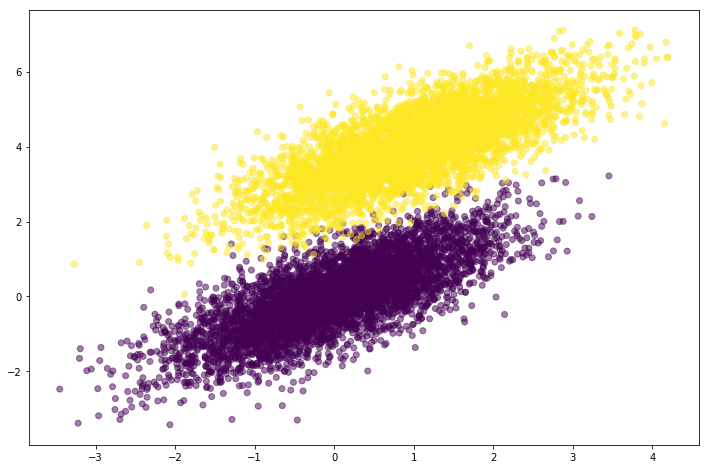

In [45]:
# 画出数据的分布图 其中x1是紫色，label=0，x2是黄色，label=1
plt.figure(figsize=(12,8))
plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1],c = simulated_labels, alpha = .5)

In [46]:
## 定义sigmoid函数
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

In [47]:
## 定义似然函数
def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = 0 - np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll

In [48]:
## 定义回归模型
def logistic_regression(features, target, num_steps, learning_rate):
    # 构建常数项系数，在z=wTx+b中可以把b看成x0=1的权重，进一步可写成z=wTx
    intercept = np.ones((features.shape[0], 1))
    features = np.hstack((intercept, features))
    # 权重初始化   
    weights = np.zeros(features.shape[1])
    
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # 梯度下降法
        output_error_signal = predictions - target
        gradient = np.dot(features.T, output_error_signal)
        weights -= learning_rate * gradient
        
        # Print log-likelihood every so often
        if step % 10000 == 0:
            print(log_likelihood(features, target, weights))
    return weights

In [49]:
## 计算权值
weights = logistic_regression(simulated_separableish_features, simulated_labels,num_steps = 100000, learning_rate = 5e-5)

4346.264779152365
148.70672276805354
142.96493623107844
141.54530307157367
141.060319659308
140.8703158589161
140.79025912753812
140.75505002269915
140.73914503180953
140.7318349891588


In [50]:
## 训练数据的准确性
data_with_intercept = np.hstack((np.ones((simulated_separableish_features.shape[0], 1)),
                                 simulated_separableish_features))
final_scores = np.dot(data_with_intercept, weights)
preds = np.round(sigmoid(final_scores))

print ('Accuracy from scratch: {0}'.format((preds == simulated_labels).sum().astype(float) / len(preds)))

Accuracy from scratch: 0.9948


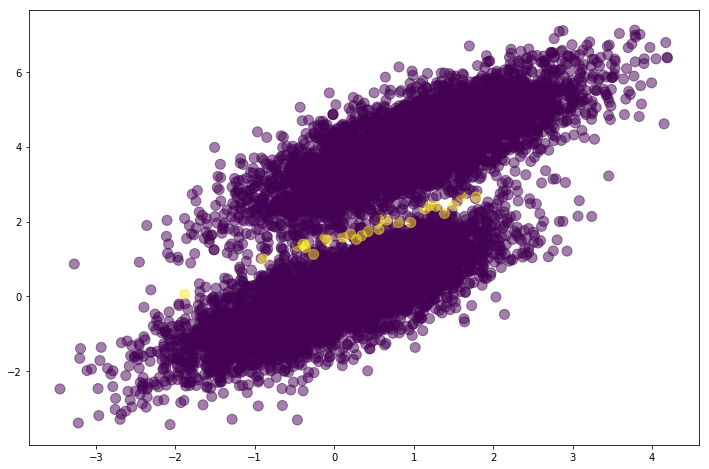

In [68]:
# 画出预测的数据图
# 预测值与真实值一致（预测正确）的点呈紫色，预测错误的为黄色
plt.figure(figsize = (12, 8))
plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1],
            c = preds == simulated_labels -1, alpha = .5, s = 100)